In [1]:
import sys
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from matplotlib import gridspec

from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
import pandas as pd
from matplotlib.lines import Line2D

#format figures
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Also, if you want your axes lines to be true black, and not this weird dark gray:
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"



matplotlib.rcParams['ytick.color'] = 'black'

# A - Growth

In [2]:
PRECISE_1 = pd.read_csv('./meta_dates-filled/P1_metadata.csv')
PRECISE_2 = pd.read_csv('./meta_dates-filled/P2_metadata_qc.csv')
PRECISE_1_sorted = PRECISE_1.sort_values('run_date')
PRECISE_2_sorted = PRECISE_2.sort_values('run_date')

PRECISE_2_sorted.head()

,Unnamed: 0,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,...,Notes,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates
77,ecoli_00081,minspan__bw_delnac_glc__1,MinSpan,minspan,bw_delnac_glc,1,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli BW25113 del_nac,...,NaN,paired-end,ILLUMINA,True,True,True,True,minspan_bw_delnac_glc,True,False
68,ecoli_00071,minspan__wt_glc__3,MinSpan,minspan,wt_glc,3,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli K-12 MG1655,...,NaN,paired-end,ILLUMINA,True,True,True,True,minspan_wt_glc,True,True
67,ecoli_00070,minspan__wt_glc__2,MinSpan,minspan,wt_glc,2,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli K-12 MG1655,...,NaN,paired-end,ILLUMINA,True,True,True,True,minspan_wt_glc,True,True
69,ecoli_00072,minspan__wt_glc__4,MinSpan,minspan,wt_glc,4,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli K-12 MG1655,...,NaN,paired-end,ILLUMINA,True,True,True,True,minspan_wt_glc,True,True
70,ecoli_00073,minspan__wt_glc_anaero__1,MinSpan,minspan,wt_glc_anaero,1,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli K-12 MG1655,...,NaN,paired-end,ILLUMINA,True,True,True,True,minspan_wt_glc_anaero,True,True


In [3]:
order = pd.DataFrame(PRECISE_1_sorted.study.unique(), columns = ['study'])
counts = pd.DataFrame(PRECISE_1_sorted.groupby(['study']).count()['condition_id'])
new_1= order.merge(counts, on = 'study')

new_1.head()

,study,condition_id
0,MinSpan,14
1,Omics,14
2,Glucose Evolution,7
3,Nac/NtrC,14
4,Control,2


In [4]:
order = pd.DataFrame(PRECISE_2_sorted.study.unique(), columns = ['study'])
counts = pd.DataFrame(PRECISE_2_sorted.groupby(['study']).count()['condition_id'])
new_2 = order.merge(counts, on = 'study')

new_2.head()

,study,condition_id
0,MinSpan,12
1,Omics,14
2,Glucose Evolution,7
3,Nac/NtrC,14
4,Control,2


In [5]:
PRECISE_1["Version"] = "PRECISE 1.0"
PRECISE_2["Version"] = "PRECISE 2.0"

all_df = pd.concat([PRECISE_1, PRECISE_2])
all_df['run_date']= pd.to_datetime(all_df['run_date'])
all_df = all_df.sort_values('run_date')
all_df['Cumulative_Condition_Count'] = [i+1 for i in range(len(all_df))]
all_df.head()

,sample_id,study,project_id,condition_id,rep_id,contact,library creator,run_date,Strain Description,Strain,...,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,Cumulative_Condition_Count
76,minspan__bw_delcra_glc__2,MinSpan,minspan,bw_delcra_glc,2,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli BW25113 del_cra,BW25113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
77,minspan__bw_delnac_glc__1,MinSpan,minspan,bw_delnac_glc,1,Aarash Bordbar,NaN,2012-10-01,Escherichia coli BW25113 del_nac,BW25113,...,paired-end,ILLUMINA,True,True,True,True,minspan_bw_delnac_glc,True,False,2
80,minspan__bw_delnac_glc__1,MinSpan,minspan,bw_delnac_glc,1,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli BW25113 del_nac,BW25113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
79,minspan__bw_delnac_ade__1,MinSpan,minspan,bw_delnac_ade,1,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli BW25113 del_nac,BW25113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
78,minspan__bw_delmntr__1,MinSpan,minspan,bw_delmntr,1,Aarash Bordbar,Haythem Latif,2012-10-01,Escherichia coli BW25113 del_mntR,BW25113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [6]:
p1_cum = []
counter = 0
for i in all_df.Version:
    if i == 'PRECISE 1.0':
        counter += 1
    p1_cum.append(counter)
    
all_df["cumulative_P1"] = p1_cum

In [7]:
p2_cum = []
counter = 0
for i in all_df.Version:
    if i == 'PRECISE 2.0':
        counter += 1
    p2_cum.append(counter)
    
all_df["cumulative_P2"] = p2_cum

In [8]:
from datetime import datetime, timedelta

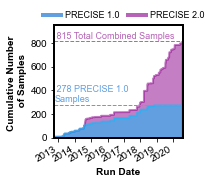

In [9]:
fig, ax = plt.subplots(figsize = (2.3,2.3))
ax.set_ylim(0,950)
ax.set_xlim(min(all_df.run_date), max(all_df.run_date) + timedelta(10))
plt.fill_between(all_df.run_date, all_df.cumulative_P2, color = 'darkmagenta', alpha=0.5,lw=2)
plt.fill_between(all_df.run_date, all_df.cumulative_P1, color = 'deepskyblue', alpha=0.5, lw=2)
ax.set_ylabel('Cumulative Number \n of Samples', fontweight ='bold')
ax.set_xlabel('Run Date', fontweight ='bold' )
plt.gcf().autofmt_xdate()
custom_lines = [Line2D([0], [0], color='#619fe1', lw=4),
                Line2D([0], [0], color='#b763b7', lw=4)]
name = ['PRECISE 1.0', 'PRECISE 2.0']
args = {'handles':custom_lines,'labels':name,'loc':2,'ncol':2,
        'bbox_to_anchor':(-0.15,1.2),'fontsize':9}
ax.legend(**args,  columnspacing=1, handletextpad=.4,
          frameon=False, labelspacing=0.11)
ax.axhline(y=(815), color ='#b763b7', linestyle = '--', linewidth = 1)
ax.text(all_df.run_date.iloc[15],830,s=' 815 Total Combined Samples', fontsize =9, color ='#b763b7')
ax.axhline(y=(278), color ='#619fe1', linestyle = '--', linewidth = 1)
ax.text(all_df.run_date.iloc[15],300,s=' 278 PRECISE 1.0\nSamples', fontsize =9, color ='#619fe1')

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')
ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

plt.gcf().autofmt_xdate()
# plt.savefig('./fig2/CumulativeSamples.pdf', dpi = 400, bbox_inches = 'tight')

# B.1 - PCA plot

In [10]:
from sklearn.decomposition import PCA
import numpy as np
sns.set_style('ticks')
import matplotlib.pyplot as plt


In [11]:
DF_log_tpm = pd.read_csv('../data/precise2/log_tpm_qc.csv', index_col=0)
DF_log_tpm.head()

,ecoli_00001,ecoli_00002,ecoli_00003,ecoli_00004,ecoli_00005,ecoli_00006,ecoli_00007,ecoli_00008,ecoli_00009,ecoli_00010,...,ecoli_00836,ecoli_00837,ecoli_00838,ecoli_00839,ecoli_00840,ecoli_00841,ecoli_00842,ecoli_00843,ecoli_00844,ecoli_00845
Geneid,,,,,,,,,,,,,,,,,,,,,
b0002,10.260569,10.368555,11.193605,11.404163,10.497016,10.235690,9.477470,9.811860,10.735874,10.726916,...,10.742892,10.725977,10.991453,11.032539,10.881214,10.808622,10.706326,10.668702,10.826346,10.825976
b0003,9.920277,10.044224,11.045580,11.460140,10.374823,10.216922,9.219235,9.861262,10.528432,10.503092,...,10.101063,10.118400,10.265804,10.294868,10.200303,10.161210,9.979079,9.992112,10.225943,10.061164
b0004,9.936694,10.010638,9.976798,10.330368,9.876910,9.638754,8.258753,8.650959,9.739519,9.722997,...,10.042148,9.975089,10.047559,10.103176,10.093910,9.998449,9.894860,9.873453,10.085281,10.029110
b0005,7.027515,7.237449,6.014337,5.854519,6.950936,6.768425,5.011006,5.137711,6.745798,6.497823,...,6.336199,6.246364,6.237686,6.181453,6.462037,6.452577,6.369624,6.362859,6.576650,6.243859
b0006,6.537183,6.452699,6.371349,6.387164,6.321764,6.405053,6.286808,6.491897,6.460234,6.467135,...,6.517823,6.626320,6.495392,6.468725,6.559674,6.472753,6.575436,6.600744,6.584743,6.751315


In [12]:
pca = PCA()
DF_weights = pd.DataFrame(pca.fit_transform(DF_log_tpm.T),index=DF_log_tpm.columns)
DF_components = pd.DataFrame(pca.components_.T,index=DF_log_tpm.index)

Number of dimensions for 99% of variance: 414


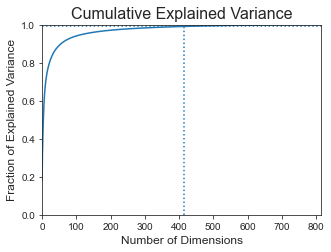

In [13]:
# Set the explained variance threshold
var_cutoff = 0.99

fig,ax = plt.subplots(figsize=(5,3.5))
pca_var = np.cumsum(pca.explained_variance_ratio_)
ax.plot(pca_var)
dims = np.where(pca_var > var_cutoff)[0][0] + 1
ax.vlines(dims,0,1,linestyles='dotted')
ax.hlines(var_cutoff,0,len(DF_log_tpm.columns),linestyles='dotted')
ax.set_ylim(0,1)
ax.set_xlim(0,len(DF_log_tpm.columns))
ax.set_ylabel('Fraction of Explained Variance',fontsize=12)
ax.set_xlabel('Number of Dimensions',fontsize=12)
ax.set_title('Cumulative Explained Variance',fontsize=16)
print('Number of dimensions for 99% of variance:',dims)

In [14]:
PRECISE_2.set_index('Unnamed: 0', inplace=True)

In [15]:
#format figures
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Also, if you want your axes lines to be true black, and not this weird dark gray:
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"



matplotlib.rcParams['ytick.color'] = 'black'

In [16]:
show_study = []
study_sort =[]
for exp_id in PRECISE_2.index:
    if PRECISE_2.loc[exp_id, 'study'] in ['AntibiotICA', 'ROS TALE', 'Respiratory quinone',
                                          'Substrate-switching Evolution', 'Two Component Systems', 'yTF',
                                         'pdhR-ALE', 'MinSpan', 'ICA', 'Pseudogene Repair', 
                                          'Glucose Evolution', 'Crp ARs', 'OxyR ALE', '42C Evolution']:
        show_study.append(PRECISE_2.loc[exp_id, 'study'])
        study_sort.append(0)
    else:
        show_study.append('All Other Studies')
        study_sort.append(1)
        
PRECISE_2['show_study'] = show_study
PRECISE_2['study_sort'] = study_sort
PRECISE_2 = PRECISE_2.sort_values(by = ['study_sort', 'show_study'], ascending = [False,True])

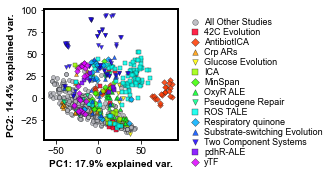

In [17]:
import pylab
NUM_COLORS = len(PRECISE_2.groupby('show_study')) 
cm = pylab.get_cmap('gist_rainbow')
colors = ['#B4B4BB']+[cm(1.*i/(NUM_COLORS-1)) for i in range(0,NUM_COLORS-1)]
marker_list = ["o", "s", "D", "^", "v","s", "D", "^", "v", "s", "D", "^", "v","s", "D", "^", "v"]
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

fig,ax = plt.subplots(figsize=(2.4,2.4))

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)


for i,(name,group) in enumerate(PRECISE_2.groupby('show_study', sort=False)):
    idx = DF_log_tpm.loc[:,group.index.tolist()].columns.tolist()
    ax.scatter(DF_weights.loc[idx,0],
               DF_weights.loc[idx,1],
               label=name,alpha=0.85, color=colors[i],marker=marker_list[i], s=16, linewidths =.4, edgecolors='#1C2021')
ax.set_xlabel('PC1: %.1f%% explained var.'%(pca.explained_variance_ratio_[0]*100),fontsize=10, fontweight ='bold')
ax.set_ylabel('PC2: %.1f%% explained var.'%(pca.explained_variance_ratio_[1]*100),fontsize=10, fontweight ='bold')
#ax.set_title('Principal Component Plot',fontsize=18)
plt.legend(bbox_to_anchor=(1,1),fontsize=9,ncol=1, markerscale=1.4, columnspacing=0.1, handletextpad=.01,
          frameon=False, labelspacing=0.11)
# plt.savefig('./fig2/PCA_20210111.pdf', dpi = 600, bbox_inches = 'tight')

# B.2 - UMAP plot

In [18]:
import umap.umap_ as umap
import sklearn.datasets

In [44]:
mapper = umap.UMAP().fit(DF_log_tpm.T)

In [48]:
names = DF_log_tpm.T.merge(PRECISE_2.show_study, how='left', left_index=True, right_index=True)
color_key = {study:colors[i] for i,study in enumerate(PRECISE_2.show_study.unique())}

color_key

{'All Other Studies': '#B4B4BB',
 '42C Evolution': (1.0, 0.0, 0.16, 1.0),
 'AntibiotICA': (1.0, 0.21939586645469003, 0.0, 1.0),
 'Crp ARs': (1.0, 0.6009538950715422, 0.0, 1.0),
 'Glucose Evolution': (1.0, 0.9825119236883944, 0.0, 1.0),
 'ICA': (0.6147323794382618, 1.0, 0.0, 1.0),
 'MinSpan': (0.23317435082140958, 1.0, 0.0, 1.0),
 'OxyR ALE': (0.0, 1.0, 0.14758591608686492, 1.0),
 'Pseudogene Repair': (0.0, 1.0, 0.5481762597512125, 1.0),
 'ROS TALE': (0.0, 1.0, 0.9276829011174367, 1.0),
 'Respiratory quinone': (0.0, 0.6894714407502134, 1.0, 1.0),
 'Substrate-switching Evolution': (0.0, 0.3058397271952257, 1.0, 1.0),
 'Two Component Systems': (0.09910485933503851, 0.0, 1.0, 1.0),
 'pdhR-ALE': (0.4827365728900258, 0.0, 1.0, 1.0),
 'yTF': (0.8663682864450132, 0.0, 1.0, 1.0)}

In [45]:
import umap.plot

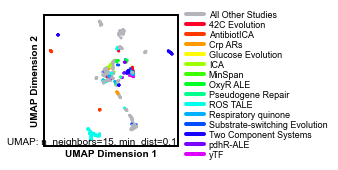

In [99]:
fig,ax = plt.subplots(figsize=(2.4,2.4))

umap.plot.points(mapper, labels=names.show_study, color_key=color_key, ax=ax, show_legend=True)

#legend
custom_legend = [Line2D([0], [0], color=color_key[i], lw=4, label=i) for i in color_key]
ax.legend(handles=custom_legend, bbox_to_anchor=(1,1.1),fontsize=9,ncol=1,
          columnspacing=0.1, handletextpad=.5,
          frameon=False, labelspacing=0.11)

#format
ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')
ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_xlabel('UMAP Dimension 1',fontsize=10, fontweight ='bold')
ax.set_ylabel('UMAP Dimension 2',fontsize=10, fontweight ='bold')

plt.savefig('./fig2/UMAP.pdf', dpi = 600, bbox_inches = 'tight')

<AxesSubplot:>

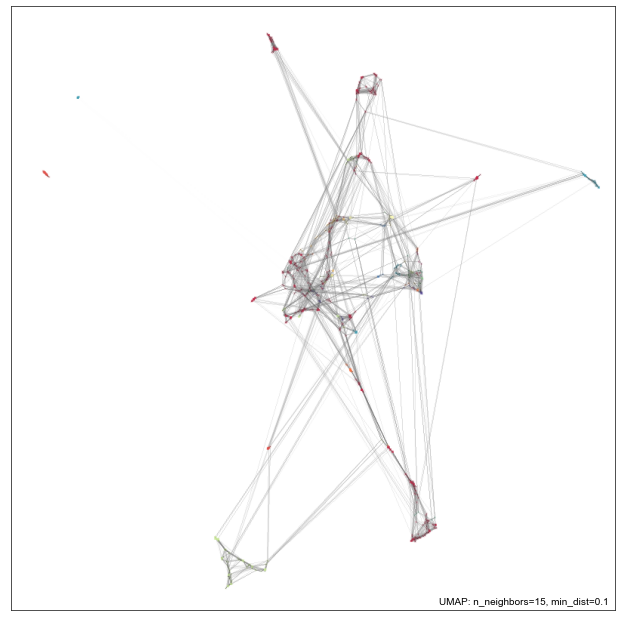

In [98]:
umap.plot.connectivity(mapper, show_points=True, labels=names.show_study)

# B.3 - tSNE

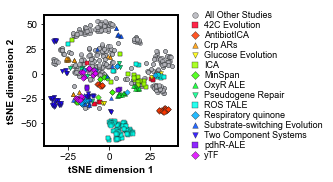

In [107]:
# Import tSNE
from sklearn.manifold import TSNE

# Initialize
tsne = TSNE(n_components=2, random_state=0)

# Project to 2D
X_2d = pd.DataFrame(tsne.fit_transform(DF_log_tpm.T), index = DF_log_tpm.T.index)


#Plot
fig,ax = plt.subplots(figsize=(2.4,2.4))

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)


for i,(name,group) in enumerate(PRECISE_2.groupby('show_study', sort=False)):
    idx = DF_log_tpm.loc[:,group.index.tolist()].columns.tolist()
    ax.scatter(X_2d.loc[idx,0],
               X_2d.loc[idx,1],
               label=name,alpha=0.85, 
               color=colors[i],marker=marker_list[i], s=16, linewidths =.4, edgecolors='#1C2021')
    
ax.set_xlabel('tSNE dimension 1',fontsize=10, fontweight ='bold')
ax.set_ylabel('tSNE dimension 2',fontsize=10, fontweight ='bold')
plt.legend(bbox_to_anchor=(1,1.1),fontsize=9,ncol=1, markerscale=1.4, columnspacing=0.1, handletextpad=.01,
          frameon=False, labelspacing=0.11)
plt.savefig('./fig2/tSNE.pdf', dpi = 600, bbox_inches = 'tight')

# C - DEGs histogram

In [18]:
import itertools
import random 

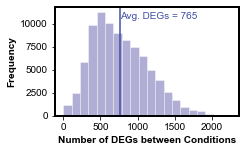

In [19]:
deg_counts = pd.read_csv('./data/degs_combined.csv', index_col=0)

deg_list = deg_counts.values.tolist()
deg_list = list(itertools.chain.from_iterable(deg_list))
deg_list = [x for x in deg_list if str(x) != 'nan']

from statistics import mean 
deg_mean = int(round(mean(deg_list),0))


fig, ax = plt.subplots(figsize = (3.3,2))

sns.distplot(deg_list, kde=False, bins=20, color='#3a3596')
ax.axvline(deg_mean, 0,1, color = '#3F4EA2')
ax.text(deg_mean, 10500, 'Avg. DEGs = '+str(deg_mean), color='#3F4EA2')

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_xlabel('Number of DEGs between Conditions', fontweight ='bold' )
plt.savefig('./fig2/DEGs_histogram.pdf', dpi = 600, bbox_inches = 'tight')

Random 5000

In [20]:
deg_counts = pd.read_csv('./data/degs_combined.csv', index_col=0)

deg_list = deg_counts.values.tolist()
deg_list = list(itertools.chain.from_iterable(deg_list))
deg_list = [x for x in deg_list if str(x) != 'nan']
deg_list_1000 = random.sample(deg_list, 5000)

In [21]:
from statistics import mean 
deg_mean = int(round(mean(deg_list_1000),0))

Text(0.5, 0, 'Number of DEGs between Conditions')

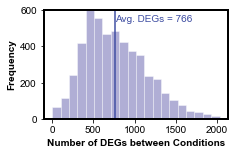

In [22]:
fig, ax = plt.subplots(figsize = (3.3,2))

sns.distplot(deg_list_1000, kde=False, bins=20, color='#3a3596')
ax.axvline(deg_mean, 0,1, color = '#3F4EA2')
ax.text(deg_mean, 540, 'Avg. DEGs = '+str(deg_mean), color='#3F4EA2')
ax.set_ylim(0,600)

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_xlabel('Number of DEGs between Conditions', fontweight ='bold' )
# plt.savefig('DEGs_histogram_5000.png', dpi = 400, bbox_inches = 'tight')

KO boxplots

In [23]:
TF_KO = PRECISE_2[PRECISE_2["Strain Description"].fillna('Empty').str.contains("del")]
TF_KO = TF_KO[~TF_KO["Strain Description"].isin(['Escherichia coli GLU.4.403.1 del_ptsH del_ptsI del_crr',
                                                'Escherichia coli K-12 MG1655 crp_delAr1delAr2',
                                                'Escherichia coli GLU.4.403.1 del_sdhC del_sdhB',
                                                'Escherichia coli K-12 MG1655 del_menF del_entC',
                                                'Escherichia coli K-12 MG1655 del_menFubiC',
                                                'Escherichia coli K-12 MG1655 delyieP',
                                                'Escherichia coli K-12 MG1655 crp_delAr2',
                                                'Escherichia coli K-12 MG1655 crp_delAr1'])]

In [24]:
gene_KO_list = [x.split('del_')[-1] for x in TF_KO["Strain Description"].unique() if 'del' in x]
gene_KO_list = list(dict.fromkeys(gene_KO_list))


In [25]:
TRN = pd.read_csv('../data/precise2/TRN.csv')

TRN_counts = pd.DataFrame(TRN.regulator.value_counts()).reset_index()
TRN_counts.rename(columns={'regulator':'regulon_count','index':'TF'}, inplace=True)
TRN_counts["lowercase"] = TRN_counts.TF.str.lower()
TRN_counts.head()

,TF,regulon_count,lowercase
0,RpoD,1698,rpod
1,ppGpp,974,ppgpp
2,Crp,556,crp
3,Nac,537,nac
4,Lrp,367,lrp


In [26]:
TF_KO_df = pd.DataFrame([x for x in gene_KO_list if x.lower() in TRN.regulator.str.lower().to_list()], 
                        columns=["TF_gene"])
TF_KO_df['lowercase'] = TF_KO_df.TF_gene.str.lower()
TF_KO_df = TF_KO_df.merge(TRN_counts, on="lowercase", how="left")

In [27]:
# PRECISE_2['tf_deg'] = PRECISE_2["Strain Description"].str.contains("|".join(TF_KO_df.TF_gene.to_list()))
# PRECISE_2.to_csv('TEMP_for_deg_comparison_curation.csv')

In [28]:
deg_TF = pd.read_csv('./data/deg_TF-KO_compare_list.csv')

deg_TF = deg_TF[['control_name', 'KO_name', 'gene', 'category']].dropna()

TF_deg_count_list = []
for index,row in deg_TF.iterrows():
    if pd.notna(deg_counts.loc[row.control_name, row.KO_name]):
        TF_deg_count_list.append(deg_counts.loc[row.control_name, row.KO_name])
    else:
        TF_deg_count_list.append(deg_counts.loc[row.KO_name, row.control_name])
deg_TF['deg_count'] = TF_deg_count_list

deg_TF = deg_TF.drop_duplicates()

deg_regulon_df = TF_KO_df.merge(deg_TF, how='left', left_on='TF_gene', 
                                right_on='gene').dropna(subset=['deg_count'])

In [50]:
deg_regulon_df.to_csv('data/TF-KO_DEG_regulon.csv')

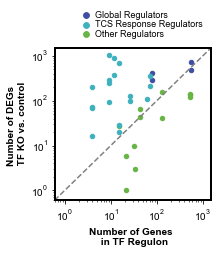

In [30]:
fig, ax = plt.subplots(figsize = (2.8,2.8))

colors = {'Global Regulators':'#3F4EA2', 
          'TCS Response Regulators':'#3FB1BE', 
          'Other Regulators': '#68B545'}

grouped = deg_regulon_df.groupby('category')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='regulon_count', y='deg_count', 
               label=key, color=colors[key])

ax.set_xscale('log')
ax.set_yscale('log')

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_ylabel('Number of DEGs \n TF KO vs. control', fontweight ='bold')
ax.set_xlabel('Number of Genes \n in TF Regulon', fontweight ='bold' )


# reorder legend so Other is last & format
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          bbox_to_anchor=(1.0,1.3),fontsize=9,ncol=1, markerscale=1.3, columnspacing=0.01, handletextpad=.01,
          frameon=False, labelspacing=0.05)

graph_min = .6 ; graph_max = 1500
ax.axline([graph_min,graph_min], [graph_max, graph_max], color='gray', ls='--')

ax.set_xlim(graph_min, graph_max); ax.set_ylim(graph_min, graph_max)

plt.savefig('./fig2/DEGs_vs_regulon.pdf', dpi = 600, bbox_inches = 'tight')

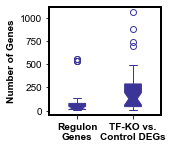

In [31]:
fig, ax = plt.subplots(figsize = (2,2))
c= ['#3a3596']
deg_regulon_df[['regulon_count', 'deg_count']].plot(kind='box', ax=ax, 
                                                    color=c[0], patch_artist=True,
                                                    notch=True,boxprops=dict(facecolor=c[0], 
                                                    color=c[0]),capprops=dict(color=c[0]),
                                                    whiskerprops=dict(color=c[0]),
                                                    flierprops=dict(color=c[0], markeredgecolor=c[0]),
                                                    medianprops=dict(color=c[0]), widths=0.3)

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_ylabel('Number of Genes', fontweight ='bold')

labels = ['Regulon\nGenes', 'TF-KO vs.\nControl DEGs']
ax.set_xticklabels(labels, fontweight ='bold')

plt.savefig('./fig2/DEGs_and_regulon_boxplot.pdf', dpi = 600, bbox_inches = 'tight')

# D - Gene Properties

In [32]:
DATA_DIR = '../data/precise2/'
PRECISE_DIR = '../data/precise/'
GENE_DIR = '../data/annotation/'
gene_info = pd.read_csv(GENE_DIR+'gene_info.csv', index_col =0)

In [33]:
ica_data = load_json_model(DATA_DIR+'precise2.json.gz')

In [34]:
compare = ica_data.M > ica_data.thresholds

in_iM = pd.DataFrame(compare.any(axis=1), columns = ["in_iM?"])

sg_iM_list = [x.split('_')[-1] for x in ica_data.imodulon_names if 'SG' in x]

metadata=pd.read_csv(DATA_DIR+'metadata_qc.csv', index_col=0)

strains = metadata["Strain Description"].dropna().unique().tolist() 
gene_KO_list = [x.split('del_')[-1] for x in strains if 'del' in x]

gene_KO_list.remove('Escherichia coli K-12 MG1655 crp_delAr1')
gene_KO_list.remove('Escherichia coli K-12 MG1655 crp_delAr1delAr2')
gene_KO_list.remove('Escherichia coli K-12 MG1655 crp_delAr2')
gene_KO_list.remove('menFubiC')
gene_KO_list.remove('Escherichia coli K-12 MG1655 delyieP'); gene_KO_list.append('yieP')

gene_KO_list = list(dict.fromkeys(gene_KO_list))

In [35]:
y = pd.read_excel('./data/GeneList.xlsx')

genes = ica_data.gene_table.merge(y, how='left')
genes = genes.merge(in_iM, how='left', left_on='bnumber', right_index=True)

log_tpm = ica_data.log_tpm.copy()

print(all(log_tpm.columns == metadata.index))

log_tpm.columns = metadata.sample_id.values

True


In [36]:
iModulon_genes =  genes[genes["in_iM?"]==True]["bnumber"].to_list()
iModulon_genes = [x for x in iModulon_genes if x in log_tpm.index.to_list()]

not_iModulon_genes = [x for x in log_tpm.index.to_list() if x not in iModulon_genes]

In [37]:
sg_iM_genes = genes[genes["gene_name"].isin(sg_iM_list)]["bnumber"].dropna().to_list()

In [38]:
outlier_mean = pd.DataFrame(log_tpm.T[not_iModulon_genes].mean(axis=0))[(-1/16*log_tpm.T[not_iModulon_genes].mean(axis=0) +1.75) < log_tpm.T[not_iModulon_genes].std(axis=0)**0.5]
outlier_SD = pd.DataFrame(log_tpm.T[not_iModulon_genes].std(axis=0)**0.5)[(-1/16*log_tpm.T[not_iModulon_genes].mean(axis=0) +1.75) < log_tpm.T[not_iModulon_genes].std(axis=0)**0.5]

outlier_df = outlier_mean.merge(outlier_SD, left_index=True, right_index=True)

outlier_df.loc[:,'0_x']

b4735     6.711218
b0880     9.828972
b0929    12.683162
b0990     5.089129
b4723     3.402119
b1145     6.140322
b1375     4.635465
b4744     4.402590
b4724     2.352720
b1729     8.280154
b2378     5.165648
b2665     7.992971
b2913    10.139317
b3525     3.235839
b4069     5.465281
b4354     4.450456
Name: 0_x, dtype: float64

In [39]:
met_genes =  genes[genes["iML1515"]==True]["bnumber"].to_list()
met_genes = [x for x in met_genes if x in log_tpm.index.to_list()]

not_met_genes = [x for x in log_tpm.index.to_list() if x not in met_genes]

In [40]:
y_genes =  genes[genes["yome"]==True]["bnumber"].to_list()
y_genes = [x for x in y_genes if x in log_tpm.index.to_list()]

not_y_genes = [x for x in log_tpm.index.to_list() if x not in y_genes]

In [41]:
proteome_genes =  list(dict.fromkeys(genes[genes["Schmidt Prot Med"] > 0]["bnumber"].to_list() + (genes[genes["Heckmann Prot Med"] > 0]["bnumber"].to_list())))
proteome_genes = [x for x in proteome_genes if x in log_tpm.index.to_list()]

not_proteome_genes = [x for x in log_tpm.index.to_list() if x not in proteome_genes]

In [42]:
sns.set_style('ticks')
#format figures
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Also, if you want your axes lines to be true black, and not this weird dark gray:
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"



matplotlib.rcParams['ytick.color'] = 'black'

In [43]:
c = ['#69b946', '#40b4bf', 'k'] #colors to use
small_font = 9 #legends and any text on figures
label_font = 10 #axis labels & ticks
title_font = 12 #labels above plots

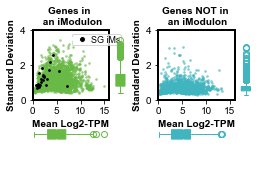

In [44]:
plt.rc('xtick', labelsize=label_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=label_font)    # fontsize of the tick labels

fig = plt.figure(figsize=(4,2.5))
gs = gridspec.GridSpec(2, 5, width_ratios=[3, .8,1,3,.8], height_ratios=[2,1.8]) 
gs.update(wspace=0.025, hspace=0.05)

ax1 = plt.subplot(gs[0])
ax1.scatter(log_tpm.T[iModulon_genes].mean(axis=0), log_tpm.T[iModulon_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color= c[0])
ax1.scatter(log_tpm.T[sg_iM_genes].mean(axis=0), log_tpm.T[sg_iM_genes].std(axis=0),
           marker='o', s=3, alpha=1, color= c[2])
ax1.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax1.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax1.set_title("Genes in \n an iModulon", fontsize = label_font, fontweight ='bold')
ax1.set_xticks(np.arange(0, 20, 5))

#legend
custom_lines = [Line2D([0], [0], marker='o',color='w', markerfacecolor=c[2], lw=4)]
name = ['SG iMs']
args = {'handles':custom_lines,'labels':name,'loc':2,'ncol':2,'bbox_to_anchor':(0.45,1),
        'fontsize':small_font, 'borderpad':0.1, 'handletextpad':0}
ax1.legend(**args)

ax2 = plt.subplot(gs[3])
ax2.scatter(log_tpm.T[not_iModulon_genes].mean(axis=0), log_tpm.T[not_iModulon_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color=c[1])
ax2.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax2.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax2.set_title("Genes NOT in \n an iModulon", fontsize = label_font, fontweight ='bold')
ax2.set_xticks(np.arange(0, 20, 5))

ax1.set_xlim(0,16); ax2.set_xlim(0,16)
ax1.set_ylim(0,4); ax2.set_ylim(0,4)
ax1.grid(False); ax2.grid(False)

ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax2.spines['top'].set_color('0'); ax2.spines['bottom'].set_color('0')
ax2.spines['left'].set_color('0'); ax2.spines['right'].set_color('0')

ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)
ax2.spines['top'].set_linewidth(2); ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2); ax2.spines['right'].set_linewidth(2)

ax3 = plt.subplot(gs[5])
ax3.boxplot(log_tpm.T[iModulon_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]))

ax3.set_xlim(0,16)
ax3.grid(False)
ax3.axis('off')

ax4 = plt.subplot(gs[8])
ax4.boxplot(log_tpm.T[not_iModulon_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]))
ax4.set_xlim(0,16)
ax4.grid(False)
ax4.axis('off')

ax1b = plt.subplot(gs[1])
ax1b.boxplot(log_tpm.T[iModulon_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]), widths=0.45)
ax1b.set_ylim(0,4)
ax1b.grid(False)
ax1b.axis('off')

ax2b = plt.subplot(gs[4])
ax2b.boxplot(log_tpm.T[not_iModulon_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]), widths=0.45)
ax2b.set_ylim(0,4)
ax2b.grid(False)
ax2b.axis('off')
fig.savefig('./fig2/genes_in_iM.pdf', bbox_inches='tight', dpi=600)

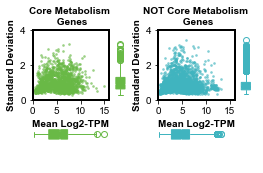

In [45]:
plt.rc('xtick', labelsize=label_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=label_font)    # fontsize of the tick labels

fig = plt.figure(figsize=(4,2.5))
gs = gridspec.GridSpec(2, 5, width_ratios=[3, .8,1,3,.8], height_ratios=[2,1.8]) 
gs.update(wspace=0.025, hspace=0.05)

ax1 = plt.subplot(gs[0])
ax1.scatter(log_tpm.T[met_genes].mean(axis=0), log_tpm.T[met_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color= c[0])
ax1.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax1.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax1.set_title("Core Metabolism \n Genes", fontsize = label_font, fontweight ='bold')
ax1.set_xticks(np.arange(0, 20, 5))

ax2 = plt.subplot(gs[3])
ax2.scatter(log_tpm.T[not_met_genes].mean(axis=0), log_tpm.T[not_met_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color=c[1])
ax2.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax2.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax2.set_title("NOT Core Metabolism \n Genes", fontsize = label_font, fontweight ='bold')
ax2.set_xticks(np.arange(0, 20, 5))

ax1.set_xlim(0,16); ax2.set_xlim(0,16)
ax1.set_ylim(0,4); ax2.set_ylim(0,4)
ax1.grid(False); ax2.grid(False)

ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax2.spines['top'].set_color('0'); ax2.spines['bottom'].set_color('0')
ax2.spines['left'].set_color('0'); ax2.spines['right'].set_color('0')

ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)
ax2.spines['top'].set_linewidth(2); ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2); ax2.spines['right'].set_linewidth(2)

ax3 = plt.subplot(gs[5])
ax3.boxplot(log_tpm.T[met_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]))

ax3.set_xlim(0,16)
ax3.grid(False)
ax3.axis('off')

ax4 = plt.subplot(gs[8])
ax4.boxplot(log_tpm.T[not_met_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]))
ax4.set_xlim(0,16)
ax4.grid(False)
ax4.axis('off')

ax1b = plt.subplot(gs[1])
ax1b.boxplot(log_tpm.T[met_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]), widths=0.45)
ax1b.set_ylim(0,4)
ax1b.grid(False)
ax1b.axis('off')

ax2b = plt.subplot(gs[4])
ax2b.boxplot(log_tpm.T[not_met_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]), widths=0.45)
ax2b.set_ylim(0,4)
ax2b.grid(False)
ax2b.axis('off')
fig.savefig('./fig2/genes_met.pdf', bbox_inches='tight', dpi=600)

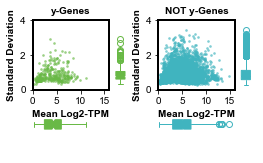

In [46]:
plt.rc('xtick', labelsize=label_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=label_font)    # fontsize of the tick labels

fig = plt.figure(figsize=(4,2.5))
gs = gridspec.GridSpec(2, 5, width_ratios=[3, .8,1,3,.8], height_ratios=[2,1.8]) 
gs.update(wspace=0.025, hspace=0.05)

ax1 = plt.subplot(gs[0])
ax1.scatter(log_tpm.T[y_genes].mean(axis=0), log_tpm.T[y_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color= c[0])
ax1.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax1.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax1.set_title("y-Genes", fontsize = label_font, fontweight ='bold')
ax1.set_xticks(np.arange(0, 20, 5))

ax2 = plt.subplot(gs[3])
ax2.scatter(log_tpm.T[not_y_genes].mean(axis=0), log_tpm.T[not_y_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color=c[1])
ax2.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax2.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax2.set_title("NOT y-Genes", fontsize = label_font, fontweight ='bold')
ax2.set_xticks(np.arange(0, 20, 5))

ax1.set_xlim(0,16); ax2.set_xlim(0,16)
ax1.set_ylim(0,4); ax2.set_ylim(0,4)
ax1.grid(False); ax2.grid(False)

ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax2.spines['top'].set_color('0'); ax2.spines['bottom'].set_color('0')
ax2.spines['left'].set_color('0'); ax2.spines['right'].set_color('0')

ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)
ax2.spines['top'].set_linewidth(2); ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2); ax2.spines['right'].set_linewidth(2)

ax3 = plt.subplot(gs[5])
ax3.boxplot(log_tpm.T[y_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]))

ax3.set_xlim(0,16)
ax3.grid(False)
ax3.axis('off')

ax4 = plt.subplot(gs[8])
ax4.boxplot(log_tpm.T[not_y_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]))
ax4.set_xlim(0,16)
ax4.grid(False)
ax4.axis('off')

ax1b = plt.subplot(gs[1])
ax1b.boxplot(log_tpm.T[y_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]), widths=0.45)
ax1b.set_ylim(0,4)
ax1b.grid(False)
ax1b.axis('off')

ax2b = plt.subplot(gs[4])
ax2b.boxplot(log_tpm.T[not_y_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]), widths=0.45)
ax2b.set_ylim(0,4)
ax2b.grid(False)
ax2b.axis('off')
fig.savefig('./fig2/genes_y.pdf', bbox_inches='tight', dpi=600)

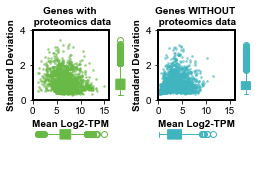

In [47]:
plt.rc('xtick', labelsize=label_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=label_font)    # fontsize of the tick labels

fig = plt.figure(figsize=(4,2.5))
gs = gridspec.GridSpec(2, 5, width_ratios=[3, .8,1,3,.8], height_ratios=[2,1.8]) 
gs.update(wspace=0.025, hspace=0.05)

ax1 = plt.subplot(gs[0])
ax1.scatter(log_tpm.T[proteome_genes].mean(axis=0), log_tpm.T[proteome_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color= c[0])
ax1.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax1.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax1.set_title("Genes with \n proteomics data", fontsize = label_font, fontweight ='bold')
ax1.set_xticks(np.arange(0, 20, 5))

ax2 = plt.subplot(gs[3])
ax2.scatter(log_tpm.T[not_proteome_genes].mean(axis=0), log_tpm.T[not_proteome_genes].std(axis=0),
           marker='o', s=3, alpha=0.5, color=c[1])
ax2.set_ylabel("Standard Deviation", fontsize = label_font, fontweight ='bold')
ax2.set_xlabel("Mean Log2-TPM", fontsize = label_font, fontweight ='bold')
ax2.set_title("Genes WITHOUT \n proteomics data", fontsize = label_font, fontweight ='bold')
ax2.set_xticks(np.arange(0, 20, 5))

ax1.set_xlim(0,16); ax2.set_xlim(0,16)
ax1.set_ylim(0,4); ax2.set_ylim(0,4)
ax1.grid(False); ax2.grid(False)

ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax2.spines['top'].set_color('0'); ax2.spines['bottom'].set_color('0')
ax2.spines['left'].set_color('0'); ax2.spines['right'].set_color('0')

ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)
ax2.spines['top'].set_linewidth(2); ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2); ax2.spines['right'].set_linewidth(2)

ax3 = plt.subplot(gs[5])
ax3.boxplot(log_tpm.T[proteome_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]))

ax3.set_xlim(0,16)
ax3.grid(False)
ax3.axis('off')

ax4 = plt.subplot(gs[8])
ax4.boxplot(log_tpm.T[not_proteome_genes].mean(axis=0), vert= False, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]))
ax4.set_xlim(0,16)
ax4.grid(False)
ax4.axis('off')

ax1b = plt.subplot(gs[1])
ax1b.boxplot(log_tpm.T[proteome_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[0], color=c[0]),capprops=dict(color=c[0]),
            whiskerprops=dict(color=c[0]),flierprops=dict(color=c[0], markeredgecolor=c[0]),
            medianprops=dict(color=c[0]), widths=0.45)
ax1b.set_ylim(0,4)
ax1b.grid(False)
ax1b.axis('off')

ax2b = plt.subplot(gs[4])
ax2b.boxplot(log_tpm.T[not_proteome_genes].std(axis=0), vert= True, patch_artist=True, notch=True,
            boxprops=dict(facecolor=c[1], color=c[1]),capprops=dict(color=c[1]),
            whiskerprops=dict(color=c[1]),flierprops=dict(color=c[1], markeredgecolor=c[1]),
            medianprops=dict(color=c[1]), widths=0.45)
ax2b.set_ylim(0,4)
ax2b.grid(False)
ax2b.axis('off')
fig.savefig('./fig2/genes_prot.pdf', bbox_inches='tight', dpi=600)

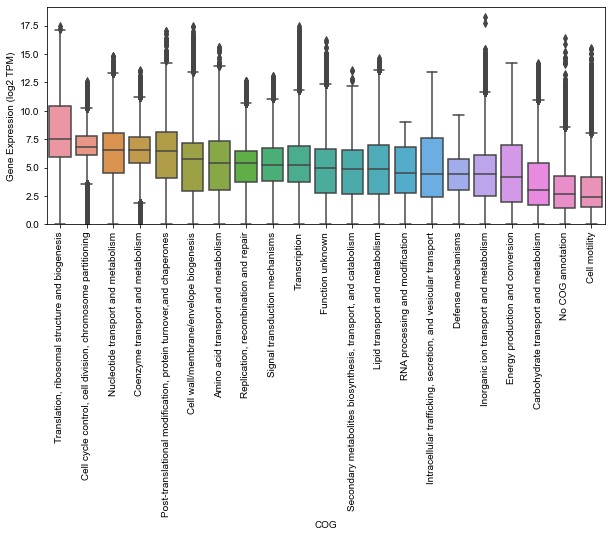

In [48]:
data = log_tpm.merge(genes[['bnumber', 'COG']], how='left', left_index=True, right_on='bnumber').drop(['bnumber'], axis=1)
data_dfm = data.melt(id_vars=['COG'], value_name="Gene Expression (log2 TPM)")
med_order = data_dfm.groupby(['COG']).median().sort_values(['Gene Expression (log2 TPM)'], ascending=False).index.to_list()

fig,ax = plt.subplots(figsize=(10,4))
sns.boxplot(x=data_dfm.COG, y=data_dfm['Gene Expression (log2 TPM)'], ax=ax, order=med_order)
plt.xticks(rotation=90)
ax.set_ylim(0,)

ax.grid(False)
ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')
# fig.savefig('./fig2/COG_genes.pdf', bbox_inches='tight', dpi=200)